In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tqdm

import torch
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from byol_pytorch import BYOL

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

In [3]:
class Mini_Dataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_list = [file for file in os.listdir(img_dir) if file.endswith('.jpg')]
        self.transform = transform
        self.img_list.sort()

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_name = self.img_list[idx]
        img_path = f'{self.img_dir}/{img_name}'
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image

In [4]:
mini_train = 'D:/NTU/DLCV/hw4/hw4_data/mini/train'
batch_size = 32

transform = transforms.Compose([transforms.Resize(128),
                                transforms.CenterCrop(128),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])
                               ])

In [5]:
mini_dataset = Mini_Dataset(mini_train, transform)
mini_dataloader = DataLoader(mini_dataset, batch_size=batch_size, shuffle=True)

In [6]:
images = next(iter(mini_dataloader))
print(images.shape)

torch.Size([32, 3, 128, 128])


In [7]:
backbone = models.resnet50(weights=None)
backbone.to(device)

learner = BYOL(backbone, image_size=128, hidden_layer='avgpool', use_momentum=False)
optimizer = torch.optim.Adam(learner.parameters(), lr=3e-4)

epoch = 0
loss_record = []

checkpoint = torch.load('p2_ckpt/backbone.pt')
backbone.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss_record = checkpoint['loss']

epoch 8: 100%|██████████████████████████████████████████████████████████| 1200/1200 [14:41<00:00,  1.36it/s, loss=1.39]


epoch 8: avg_loss = 0.9398312978229175
saved p2_ckpt/backbone.pt


epoch 9: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:27<00:00,  1.49it/s, loss=0.812]


epoch 9: avg_loss = 0.8438595825744172
saved p2_ckpt/backbone.pt


epoch 10: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:39<00:00,  1.46it/s, loss=0.666]


epoch 10: avg_loss = 0.842045261648794
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_10.pt


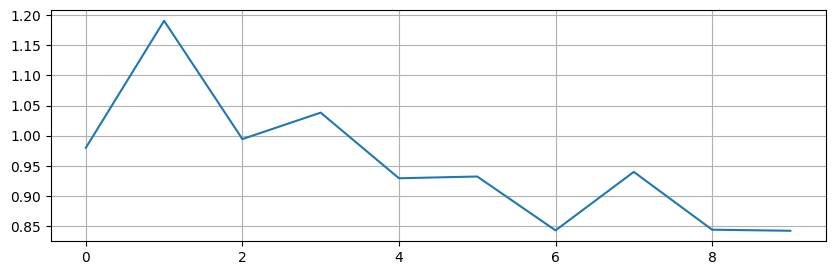

epoch 11: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:10<00:00,  1.52it/s, loss=0.487]


epoch 11: avg_loss = 0.8113537887235482
saved p2_ckpt/backbone.pt


epoch 12: 100%|████████████████████████████████████████████████████████| 1200/1200 [12:51<00:00,  1.55it/s, loss=0.662]


epoch 12: avg_loss = 0.7809750979983558
saved p2_ckpt/backbone.pt


epoch 13: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:15<00:00,  1.51it/s, loss=1.54]


epoch 13: avg_loss = 0.7566372334398329
saved p2_ckpt/backbone.pt


epoch 14: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:35<00:00,  1.47it/s, loss=1.01]


epoch 14: avg_loss = 0.7432789200140785
saved p2_ckpt/backbone.pt


epoch 15: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:01<00:00,  1.53it/s, loss=0.233]


epoch 15: avg_loss = 0.7407048223540187
saved p2_ckpt/backbone.pt


epoch 16: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:26<00:00,  1.49it/s, loss=0.345]


epoch 16: avg_loss = 0.7086890157870949
saved p2_ckpt/backbone.pt


epoch 17: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:34<00:00,  1.47it/s, loss=1.53]


epoch 17: avg_loss = 0.6897329386106382
saved p2_ckpt/backbone.pt


epoch 18: 100%|████████████████████████████████████████████████████████| 1200/1200 [22:08<00:00,  1.11s/it, loss=0.729]


epoch 18: avg_loss = 0.7132003634981811
saved p2_ckpt/backbone.pt


epoch 19: 100%|█████████████████████████████████████████████████████████| 1200/1200 [16:09<00:00,  1.24it/s, loss=0.24]


epoch 19: avg_loss = 0.6863276723089318
saved p2_ckpt/backbone.pt


epoch 20: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:21<00:00,  1.30it/s, loss=0.342]


epoch 20: avg_loss = 0.6592486909745882
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_20.pt


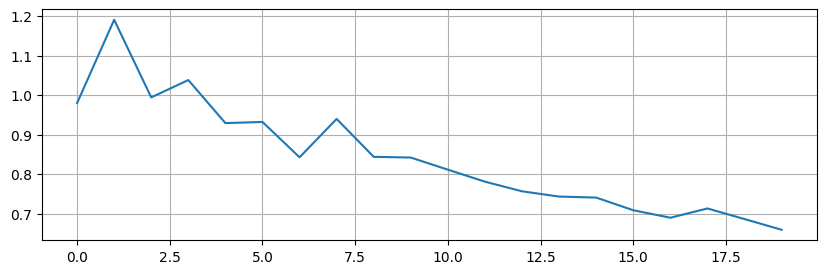

epoch 21: 100%|█████████████████████████████████████████████████████████| 1200/1200 [14:41<00:00,  1.36it/s, loss=0.25]


epoch 21: avg_loss = 0.6303046676578621
saved p2_ckpt/backbone.pt


epoch 22: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:41<00:00,  1.46it/s, loss=0.467]


epoch 22: avg_loss = 0.6002621926926076
saved p2_ckpt/backbone.pt


epoch 23: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:14<00:00,  1.51it/s, loss=1.79]


epoch 23: avg_loss = 0.5988466653662423
saved p2_ckpt/backbone.pt


epoch 24: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:39<00:00,  1.46it/s, loss=0.533]


epoch 24: avg_loss = 0.5834250671726962
saved p2_ckpt/backbone.pt


epoch 25: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:38<00:00,  1.47it/s, loss=0.292]


epoch 25: avg_loss = 0.6218234908704956
saved p2_ckpt/backbone.pt


epoch 26: 100%|███████████████████████████████████████████████████████| 1200/1200 [13:43<00:00,  1.46it/s, loss=0.0456]


epoch 26: avg_loss = 0.5814040186411391
saved p2_ckpt/backbone.pt


epoch 27: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:19<00:00,  1.50it/s, loss=0.879]


epoch 27: avg_loss = 0.5829913335883369
saved p2_ckpt/backbone.pt


epoch 28: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:24<00:00,  1.49it/s, loss=0.512]


epoch 28: avg_loss = 0.5724516784523924
saved p2_ckpt/backbone.pt


epoch 29: 100%|████████████████████████████████████████████████████████| 1200/1200 [22:10<00:00,  1.11s/it, loss=0.326]


epoch 29: avg_loss = 0.5616633965571721
saved p2_ckpt/backbone.pt


epoch 30: 100%|█████████████████████████████████████████████████████████| 1200/1200 [16:26<00:00,  1.22it/s, loss=0.11]


epoch 30: avg_loss = 0.5685314894933253
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_30.pt


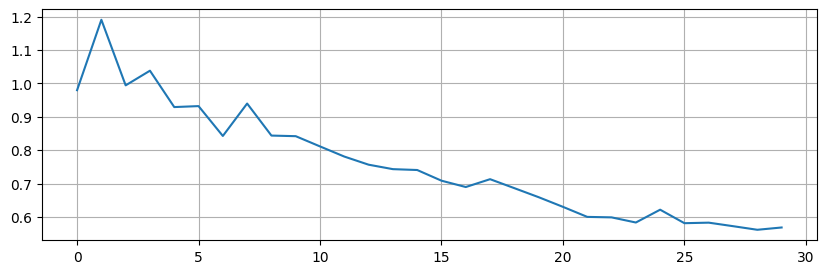

epoch 31: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:22<00:00,  1.50it/s, loss=0.319]


epoch 31: avg_loss = 0.5290477613452822
saved p2_ckpt/backbone.pt


epoch 32: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:31<00:00,  1.29it/s, loss=0.438]


epoch 32: avg_loss = 0.5407583994542559
saved p2_ckpt/backbone.pt


epoch 33: 100%|█████████████████████████████████████████████████████████| 1200/1200 [16:02<00:00,  1.25it/s, loss=1.53]


epoch 33: avg_loss = 0.532501120781526
saved p2_ckpt/backbone.pt


epoch 34: 100%|████████████████████████████████████████████████████████| 1200/1200 [16:05<00:00,  1.24it/s, loss=0.312]


epoch 34: avg_loss = 0.5258754906244576
saved p2_ckpt/backbone.pt


epoch 35: 100%|████████████████████████████████████████████████████████| 1200/1200 [16:16<00:00,  1.23it/s, loss=0.148]


epoch 35: avg_loss = 0.5219837578882773
saved p2_ckpt/backbone.pt


epoch 36: 100%|████████████████████████████████████████████████████████| 1200/1200 [18:04<00:00,  1.11it/s, loss=0.478]


epoch 36: avg_loss = 0.5323490054750194
saved p2_ckpt/backbone.pt


epoch 37: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:38<00:00,  1.28it/s, loss=0.273]


epoch 37: avg_loss = 0.5318339261164268
saved p2_ckpt/backbone.pt


epoch 38: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:42<00:00,  1.46it/s, loss=1.33]


epoch 38: avg_loss = 0.5144411269699534
saved p2_ckpt/backbone.pt


epoch 39: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:27<00:00,  1.49it/s, loss=0.74]


epoch 39: avg_loss = 0.5137858682963997
saved p2_ckpt/backbone.pt


epoch 40: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:03<00:00,  1.42it/s, loss=0.717]


epoch 40: avg_loss = 0.5055340922841182
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_40.pt


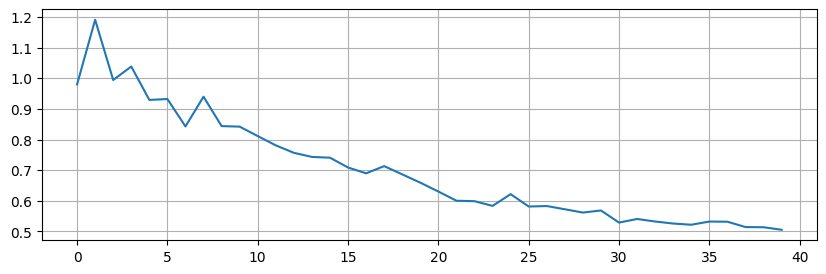

epoch 41: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:22<00:00,  1.49it/s, loss=0.389]


epoch 41: avg_loss = 0.5099262982296447
saved p2_ckpt/backbone.pt


epoch 42: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:17<00:00,  1.50it/s, loss=0.38]


epoch 42: avg_loss = 0.5116711949867507
saved p2_ckpt/backbone.pt


epoch 43: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:03<00:00,  1.53it/s, loss=1.01]


epoch 43: avg_loss = 0.5022851184538255
saved p2_ckpt/backbone.pt


epoch 44: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:27<00:00,  1.49it/s, loss=0.542]


epoch 44: avg_loss = 0.5055609438133737
saved p2_ckpt/backbone.pt


epoch 45: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:54<00:00,  1.44it/s, loss=0.348]


epoch 45: avg_loss = 0.49890261435570815
saved p2_ckpt/backbone.pt


epoch 46: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:23<00:00,  1.49it/s, loss=1.11]


epoch 46: avg_loss = 0.49751654950901864
saved p2_ckpt/backbone.pt


epoch 47: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:30<00:00,  1.48it/s, loss=0.655]


epoch 47: avg_loss = 0.517534581689785
saved p2_ckpt/backbone.pt


epoch 48: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:35<00:00,  1.47it/s, loss=0.275]


epoch 48: avg_loss = 0.48925264505669475
saved p2_ckpt/backbone.pt


epoch 49: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:40<00:00,  1.46it/s, loss=0.245]


epoch 49: avg_loss = 0.5093834588055809
saved p2_ckpt/backbone.pt


epoch 50: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:54<00:00,  1.44it/s, loss=0.219]


epoch 50: avg_loss = 0.536969828636696
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_50.pt


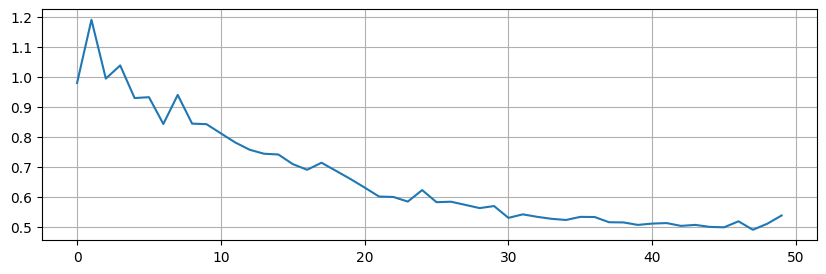

epoch 51: 100%|█████████████████████████████████████████████████████████| 1200/1200 [14:05<00:00,  1.42it/s, loss=1.32]


epoch 51: avg_loss = 0.5200092705835899
saved p2_ckpt/backbone.pt


epoch 52: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:28<00:00,  1.48it/s, loss=0.569]


epoch 52: avg_loss = 0.5042003495463481
saved p2_ckpt/backbone.pt


epoch 53: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:21<00:00,  1.30it/s, loss=0.399]


epoch 53: avg_loss = 0.48324417203354336
saved p2_ckpt/backbone.pt


epoch 54: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:15<00:00,  1.40it/s, loss=0.475]


epoch 54: avg_loss = 0.5010028256755322
saved p2_ckpt/backbone.pt


epoch 55: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:28<00:00,  1.48it/s, loss=0.157]


epoch 55: avg_loss = 0.5044391397014261
saved p2_ckpt/backbone.pt


epoch 56: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:36<00:00,  1.47it/s, loss=0.367]


epoch 56: avg_loss = 0.4993850146078815
saved p2_ckpt/backbone.pt


epoch 57: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:38<00:00,  1.47it/s, loss=0.334]


epoch 57: avg_loss = 0.48381550357677044
saved p2_ckpt/backbone.pt


epoch 58: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:35<00:00,  1.47it/s, loss=0.418]


epoch 58: avg_loss = 0.49166568062578636
saved p2_ckpt/backbone.pt


epoch 59: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:46<00:00,  1.45it/s, loss=0.204]


epoch 59: avg_loss = 0.5087014086792866
saved p2_ckpt/backbone.pt


epoch 60: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:44<00:00,  1.46it/s, loss=0.545]


epoch 60: avg_loss = 0.49287590670088927
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_60.pt


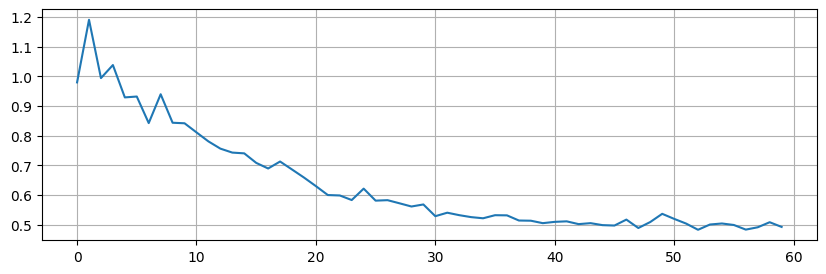

epoch 61: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:25<00:00,  1.49it/s, loss=0.167]


epoch 61: avg_loss = 0.49404129568487404
saved p2_ckpt/backbone.pt


epoch 62: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:32<00:00,  1.48it/s, loss=0.211]


epoch 62: avg_loss = 0.5058730737430354
saved p2_ckpt/backbone.pt


epoch 63: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:54<00:00,  1.44it/s, loss=0.433]


epoch 63: avg_loss = 0.4986217762622982
saved p2_ckpt/backbone.pt


epoch 64: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:09<00:00,  1.52it/s, loss=0.413]


epoch 64: avg_loss = 0.4505371622958531
saved p2_ckpt/backbone.pt


epoch 65: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:43<00:00,  1.46it/s, loss=0.244]


epoch 65: avg_loss = 0.494600323351721
saved p2_ckpt/backbone.pt


epoch 66: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:14<00:00,  1.51it/s, loss=0.983]


epoch 66: avg_loss = 0.49253738737354674
saved p2_ckpt/backbone.pt


epoch 67: 100%|███████████████████████████████████████████████████████| 1200/1200 [13:16<00:00,  1.51it/s, loss=0.0656]


epoch 67: avg_loss = 0.4872913430289676
saved p2_ckpt/backbone.pt


epoch 68: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:34<00:00,  1.47it/s, loss=0.282]


epoch 68: avg_loss = 0.49547532937799893
saved p2_ckpt/backbone.pt


epoch 69: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:43<00:00,  1.46it/s, loss=1.06]


epoch 69: avg_loss = 0.47522826691778997
saved p2_ckpt/backbone.pt


epoch 70: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:38<00:00,  1.47it/s, loss=0.181]


epoch 70: avg_loss = 0.48560506279269855
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_70.pt


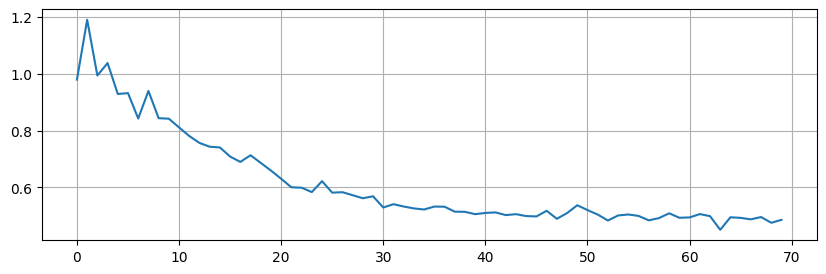

epoch 71: 100%|█████████████████████████████████████████████████████████| 1200/1200 [16:07<00:00,  1.24it/s, loss=0.62]


epoch 71: avg_loss = 0.49428421242473025
saved p2_ckpt/backbone.pt


epoch 72: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:20<00:00,  1.50it/s, loss=0.123]


epoch 72: avg_loss = 0.49254623473311465
saved p2_ckpt/backbone.pt


epoch 73: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:34<00:00,  1.47it/s, loss=0.295]


epoch 73: avg_loss = 0.4905300746050974
saved p2_ckpt/backbone.pt


epoch 74: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:33<00:00,  1.47it/s, loss=1.09]


epoch 74: avg_loss = 0.49467205494021377
saved p2_ckpt/backbone.pt


epoch 75: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:39<00:00,  1.46it/s, loss=0.111]


epoch 75: avg_loss = 0.47740505445438125
saved p2_ckpt/backbone.pt


epoch 76: 100%|█████████████████████████████████████████████████████████| 1200/1200 [14:38<00:00,  1.37it/s, loss=0.19]


epoch 76: avg_loss = 0.48294098212383685
saved p2_ckpt/backbone.pt


epoch 77: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:40<00:00,  1.36it/s, loss=0.507]


epoch 77: avg_loss = 0.5055151868642618
saved p2_ckpt/backbone.pt


epoch 78: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:04<00:00,  1.42it/s, loss=0.255]


epoch 78: avg_loss = 0.4895910446594159
saved p2_ckpt/backbone.pt


epoch 79: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:55<00:00,  1.44it/s, loss=0.527]


epoch 79: avg_loss = 0.4983753823954612
saved p2_ckpt/backbone.pt


epoch 80: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:13<00:00,  1.51it/s, loss=0.482]


epoch 80: avg_loss = 0.48481274334403374
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_80.pt


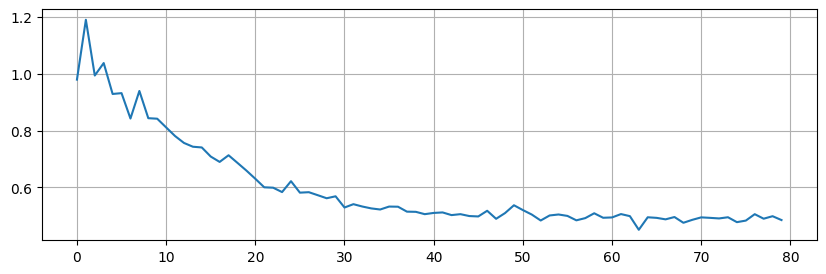

epoch 81: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:13<00:00,  1.51it/s, loss=0.628]


epoch 81: avg_loss = 0.48714993921418986
saved p2_ckpt/backbone.pt


epoch 82: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:15<00:00,  1.40it/s, loss=0.205]


epoch 82: avg_loss = 0.4859870957707365
saved p2_ckpt/backbone.pt


epoch 83: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:51<00:00,  1.35it/s, loss=0.271]


epoch 83: avg_loss = 0.477492597643286
saved p2_ckpt/backbone.pt


epoch 84: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:03<00:00,  1.42it/s, loss=0.123]


epoch 84: avg_loss = 0.4785472714000692
saved p2_ckpt/backbone.pt


epoch 85: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:04<00:00,  1.42it/s, loss=0.174]


epoch 85: avg_loss = 0.46728981999059516
saved p2_ckpt/backbone.pt


epoch 86: 100%|████████████████████████████████████████████████████████| 1200/1200 [13:58<00:00,  1.43it/s, loss=0.155]


epoch 86: avg_loss = 0.49298349330201746
saved p2_ckpt/backbone.pt


epoch 87: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:49<00:00,  1.35it/s, loss=0.162]


epoch 87: avg_loss = 0.48268316353981694
saved p2_ckpt/backbone.pt


epoch 88: 100%|████████████████████████████████████████████████████████| 1200/1200 [16:36<00:00,  1.20it/s, loss=0.403]


epoch 88: avg_loss = 0.5020040764970084
saved p2_ckpt/backbone.pt


epoch 89: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:56<00:00,  1.25it/s, loss=0.221]


epoch 89: avg_loss = 0.4917234329227358
saved p2_ckpt/backbone.pt


epoch 90: 100%|███████████████████████████████████████████████████████| 1200/1200 [16:04<00:00,  1.24it/s, loss=0.0693]


epoch 90: avg_loss = 0.47207982738812765
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_90.pt


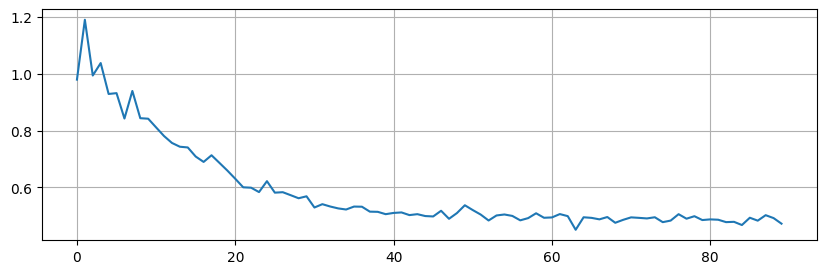

epoch 91: 100%|█████████████████████████████████████████████████████████| 1200/1200 [13:56<00:00,  1.43it/s, loss=0.09]


epoch 91: avg_loss = 0.4898542445308218
saved p2_ckpt/backbone.pt


epoch 92: 100%|█████████████████████████████████████████████████████████| 1200/1200 [14:05<00:00,  1.42it/s, loss=0.47]


epoch 92: avg_loss = 0.4927444962132722
saved p2_ckpt/backbone.pt


epoch 93: 100%|███████████████████████████████████████████████████████| 1200/1200 [13:57<00:00,  1.43it/s, loss=0.0823]


epoch 93: avg_loss = 0.48465894257339337
saved p2_ckpt/backbone.pt


epoch 94: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:03<00:00,  1.42it/s, loss=0.488]


epoch 94: avg_loss = 0.4973740105579297
saved p2_ckpt/backbone.pt


epoch 95: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:07<00:00,  1.42it/s, loss=0.392]


epoch 95: avg_loss = 0.4947132190316916
saved p2_ckpt/backbone.pt


epoch 96: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:01<00:00,  1.33it/s, loss=0.698]


epoch 96: avg_loss = 0.4947023189999163
saved p2_ckpt/backbone.pt


epoch 97: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:35<00:00,  1.28it/s, loss=0.715]


epoch 97: avg_loss = 0.4978257612728824
saved p2_ckpt/backbone.pt


epoch 98: 100%|████████████████████████████████████████████████████████| 1200/1200 [14:33<00:00,  1.37it/s, loss=0.609]


epoch 98: avg_loss = 0.4822730102793624
saved p2_ckpt/backbone.pt


epoch 99: 100%|████████████████████████████████████████████████████████| 1200/1200 [15:13<00:00,  1.31it/s, loss=0.615]


epoch 99: avg_loss = 0.4753527501380692
saved p2_ckpt/backbone.pt


epoch 100: 100%|███████████████████████████████████████████████████████| 1200/1200 [14:25<00:00,  1.39it/s, loss=0.305]


epoch 100: avg_loss = 0.4826307225475709
saved p2_ckpt/backbone.pt
saved p2_ckpt/backbone_100.pt


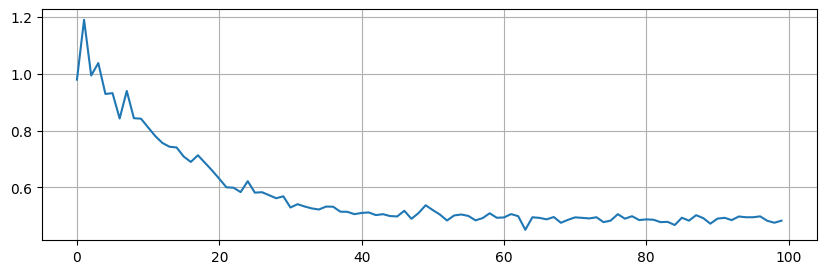

In [9]:
max_epoch = 100
for e in range(epoch+1, max_epoch+1):
    avg_loss = 0
    batch_num = len(mini_dataloader)
    with tqdm.tqdm(total=batch_num) as pbar:
        pbar.set_description(f'epoch {e}')
        for images in mini_dataloader:
            images = images.to(device)
            loss = learner(images)
            avg_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pbar.set_postfix({'loss': loss.item()})
            pbar.update(1)
    avg_loss /= batch_num
    print(f'epoch {e}: avg_loss = {avg_loss}')
    loss_record.append(avg_loss)
    
    # save model
    backbone_save_path = f'p2_ckpt/backbone.pt'
    torch.save({'epoch': e,
                'model_state_dict': backbone.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_record,},
               backbone_save_path)
    print(f'saved {backbone_save_path}')
    if e%10 == 0:
        backbone_save_path = f'p2_ckpt/backbone_{e}.pt'
        torch.save({'epoch': e,
                    'model_state_dict': backbone.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss_record,},
                   backbone_save_path)
        print(f'saved {backbone_save_path}')
        plt.figure(figsize=(10,3))
        plt.plot(loss_record)
        plt.grid()
        plt.show()

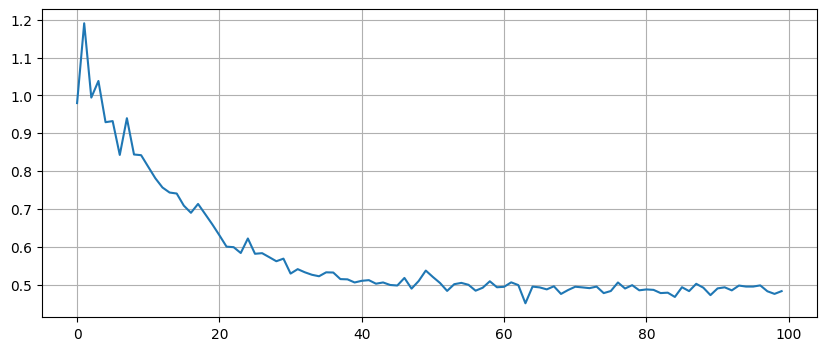

In [10]:
plt.figure(figsize=(10,4))
plt.plot(loss_record)
plt.grid()
plt.show()

In [ ]:
backbone_save_path = f'p2_ckpt/backbone_{e-1}.pt'
torch.save({'epoch': e-1,
            'model_state_dict': backbone.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_record,},
           backbone_save_path)
print(f'saved {backbone_save_path}')